## Plot of B\&B convergence 


timestep 0 7.091429175239733 1.2750447714278146

timestep 1 6.075326122022576 1.2750447714278146

timestep 2 5.5932024213782725 1.2750447714278146

timestep 3 5.5932024213782725 1.2750447714278146

timestep 4 3.960379419578586 1.559225420692975

timestep 5 3.9603794195785853 1.6974913327016237

timestep 6 3.9603794195785853 1.6974913327016237

timestep 7 3.9603794195785853 1.6974913327016237

timestep 8 3.9603794195785853 1.783458536774994

timestep 9 3.9603794195785853 1.783458536774994

timestep 10 3.9603794195785853 1.783458536774994

timestep 11 3.9603794195785853 1.783458536774994

timestep 12 3.9603794195785853 2.0247911905459977

timestep 13 3.9603794195785853 2.0247911905459977

timestep 14 3.9603794195785853 2.196299253515746

timestep 15 3.9603794195785853 2.2225526033931007

timestep 16 3.9603794195785853 2.2225526033931007

timestep 17 3.9603794195785853 2.2233686945657443

timestep 18 3.9603794195785853 2.3149150335588784

timestep 19 3.9603794195785853 2.6092054360098067

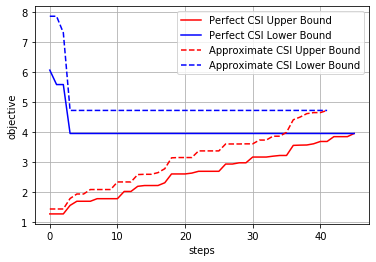

In [3]:
perfect_csi_name = 'Perfect CSI'
approximate_csi_name = 'Approximate CSI'

from antenna_selection.bb_unified import solve_bb
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(seed = 1000)
N = 8
M = 6
max_ant = 4

H = (np.random.randn(N, M) + 1j*np.random.randn(N,M))/np.sqrt(2)
instance = np.stack((np.real(H), np.imag(H)), axis=0)
_, global_U, timesteps, t, lb_list, ub_list, num_sdps = solve_bb(instance, max_ant=max_ant, max_iter = 7000, robust_beamforming=False)
_, global_U, timesteps, t, lb_list_approx, ub_list_approx, num_sdps_approx = solve_bb(instance, max_ant=max_ant, max_iter = 7000, robust_beamforming=True)

fig, ax = plt.subplots(1,1)
ax.plot(ub_list, color='blue')
ax.plot(lb_list, color='red')
ax.plot(ub_list_approx, color='blue', linestyle='--')
ax.plot(lb_list_approx, color='red' , linestyle='--')
ax.legend(['Perfect CSI Upper Bound', 'Perfect CSI Lower Bound',
            'Approximate CSI Upper Bound', 'Approximate CSI Lower Bound'])
ax.set_xlabel('iteration')
ax.set_ylabel('objective')
ax.grid('on')

In [7]:
a = np.random.rand(5,4)

In [8]:
np.sum(a, axis=0)

array([2.94593505, 3.27337299, 2.52153154, 1.62243265])

In [9]:
a

array([[0.72001539, 0.79040298, 0.32105144, 0.03728096],
       [0.56439251, 0.67787072, 0.96954623, 0.68415889],
       [0.70833934, 0.73106852, 0.13938528, 0.09549539],
       [0.9505924 , 0.96124814, 0.30456753, 0.55916402],
       [0.00259541, 0.11278263, 0.78698106, 0.24633339]])

In [13]:
# Save figure 
fig.savefig('data/figures/bb_convergence_plot.pdf')

## B&B performance table compared to the exhaustive search

In [6]:
import numpy as np
import math
import pickle

# Filepath where the results are saved
# bb_eval_data contains the first set of results whereas bb_eval_data_additional* contains additional combinations trial
save_data_filepath = 'data/bb_approximate_eval_data.pkl'

with open(save_data_filepath, 'rb') as handle:
    data = pickle.load( handle)


def nCr(n,r):
    f = math.factorial
    return int(f(n) / f(r) / f(n-r))

ll = [(str(data['size'][i]), np.mean(data['data'][i][3]), np.mean(data['data'][i][4]), nCr(data['size'][i][0], data['size'][i][2]) ) for i in range(len(data['data']))]
# ll2 = [(str(combinations1[i]), np.mean(data1['data'][i][3]), np.mean(data1['data'][i][4]), nCr(combinations1[i][0], combinations1[i][2]) ) for i in range(len(data1['data']))]
# ll = ll + ll2

for i in range(len(ll)):
#     ll[i]  = [str(item) for item in ll[i] ]
    print('{:>12}     {:>.2f}     {:.2f}      {}'.format(*ll[i]))

   (4, 2, 2)     1.19     6.90      6
   (4, 3, 2)     2.18     7.83      6
   (8, 2, 4)     7.09     31.60      70
   (8, 3, 4)     15.09     39.37      70
   (8, 4, 4)     28.39     49.00      70
   (8, 5, 4)     52.11     64.50      70
  (10, 2, 6)     19.49     65.27      210


In [2]:
data['size']

[(4, 2, 2),
 (4, 3, 2),
 (8, 3, 4),
 (8, 5, 4),
 (8, 7, 4),
 (10, 4, 6),
 (10, 6, 6),
 (10, 8, 6),
 (12, 6, 8),
 (12, 8, 8),
 (12, 10, 8)]